# Imports

In [1]:
%matplotlib inline

import scipy as sp
from scipy import stats
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

import statistics

# Load Data

In [2]:
tracing_df = statistics.load_tracing_features(sort='order')
recording_df = statistics.load_recording_relations()
recording_df = statistics.associate_recordings(recording_df, tracing_df)
print(len(recording_df), 'recordings')

52 recordings


In [3]:
gaze_dfs = statistics.load_gaze_features()
statistics.check_gaze_recording_associations(recording_df, gaze_dfs)
statistics.compute_gaze_features(gaze_dfs)
gaze_df = statistics.combine_gaze_features(gaze_dfs)

In [4]:
full_df = statistics.combine_all_features(recording_df, gaze_df)
full_df.columns

Index(['id', 'subjectNumber', 'scenarioNumber', 'newAfterOld', 'scenarioType',
       'displayType', 'sensorPlacementTime', 'ppvStartTime', 'ccStartTime',
       'inSpO2TargetRangeDuration', 'inSpO2LooseTargetRangeDuration',
       'inSpO2TargetRangeStartTime', 'aboveSpO2TargetRangeDuration',
       'belowSpO2TargetRangeDuration', 'inFiO2TargetRangeDuration',
       'inFiO2TargetRangeStartTime', 'aboveFiO2TargetRangeDuration',
       'belowFiO2TargetRangeDuration', 'spO2SignedErrorIntegral',
       'spO2UnsignedErrorIntegral', 'spO2SquaredErrorIntegral',
       'fiO2LargeAdjustments', 'visitDuration_fiO2Dial',
       'visitDuration_infant', 'visitDuration_monitorApgarTimer',
       'visitDuration_monitorBlank', 'visitDuration_monitorFiO2',
       'visitDuration_monitorFull', 'visitDuration_monitorGraph',
       'visitDuration_monitorHeartRate', 'visitDuration_monitorSpO2',
       'visitDuration_spO2ReferenceTable',
       'visitDuration_warmerInstrumentPanel', 'visitDuration_combinedFi

# Aggregate Comparisons

## Histograms of Count Outcomes per Scenario/Display Pairing

### Monitor Gaze

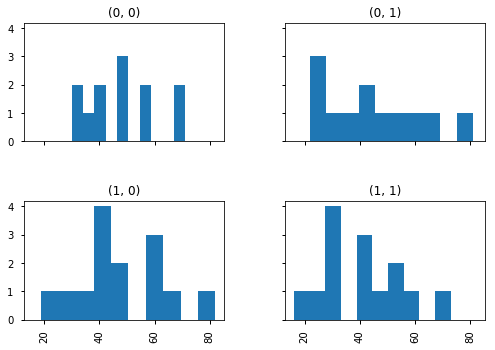

In [5]:
statistics.hist_scenario_display(full_df, 'visitCount_monitorFull')

I can't tell any meaningful differences here.

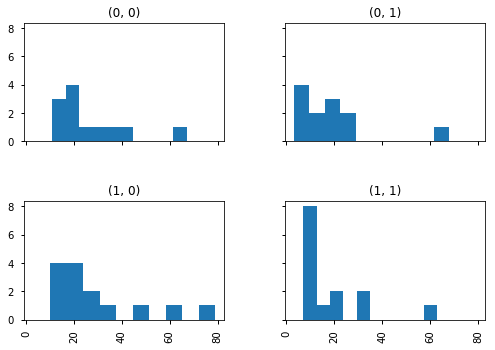

In [6]:
statistics.hist_scenario_display(full_df, 'visitCount_monitorBlank')

Observations:

* Subjects seem to look at blank areas of the screen less frequently with the full display than the minimal display.

### SpO2 Gaze

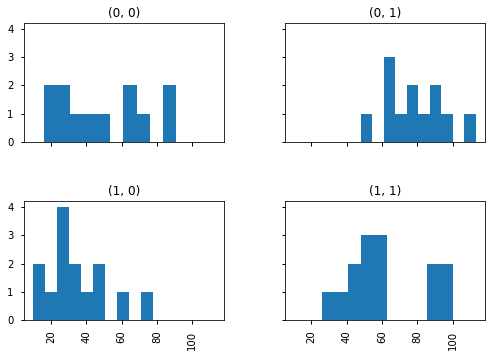

In [7]:
statistics.hist_scenario_display(full_df, 'visitCount_combinedSpO2')

Observations:

* Subjects seem to look at SpO2-related areas more frequently in the easy scenario than in the hard scenario.
* Subjects seem to look at SpO2-related areas more frequently with the full display than the minimal display.
* This could just be explained by the addition of a new region, however.

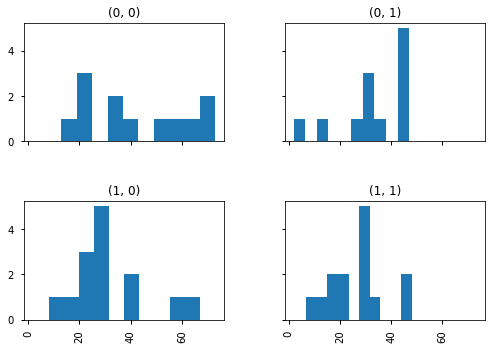

In [8]:
statistics.hist_scenario_display(full_df, 'visitCount_monitorSpO2')

Observations:

* Subjects seem to look at the SpO2 box more frequently in the easy scenario with the full display than with the minimal display.
* In the hard scenario, there doesn't seem to be any difference in frequency of gaze at at the SpO2 box less with the full display vs. the minimal display.

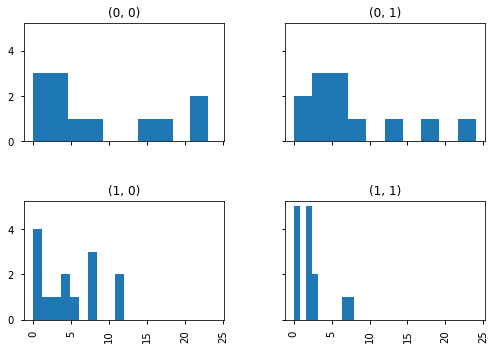

In [9]:
statistics.hist_scenario_display(full_df, 'visitCount_spO2ReferenceTable')

Observations:

* Subjects seem to look at the SpO2 reference table more frequently in the easy scenario than in the hard scenario.
* Subjects seem to look at the SpO2 reference table less frequently in the hard scenario with the full display than the minimal display. It's hard to tell what's going on in the easy scenario.

### FiO2 Gaze

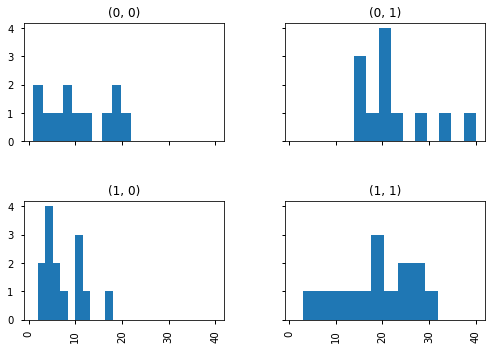

In [10]:
statistics.hist_scenario_display(full_df, 'visitCount_combinedFiO2')

Observations:

* Subjects are looking at FiO2 less in the hard scenario than in the easy scenario with the full display, but maybe not with the minimal display.
* Subjects are looking at FiO2 more with the full display than with the minimal display.

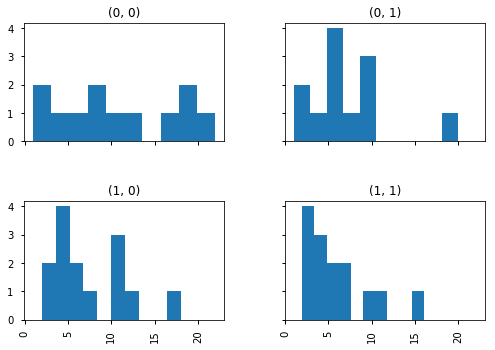

In [11]:
statistics.hist_scenario_display(full_df, 'visitCount_fiO2Dial')

Observations:

* Subjects are looking at the FiO2 dial less with the full display than the minimal display in the easy scenario.

### Other Monitor Elements

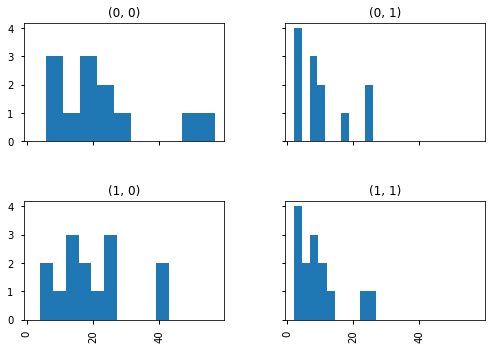

In [12]:
statistics.hist_scenario_display(full_df, 'visitCount_monitorApgarTimer')

Observations:

* Subjects seem to look at the Apgar timer less frequently with the full display than the minimal display.

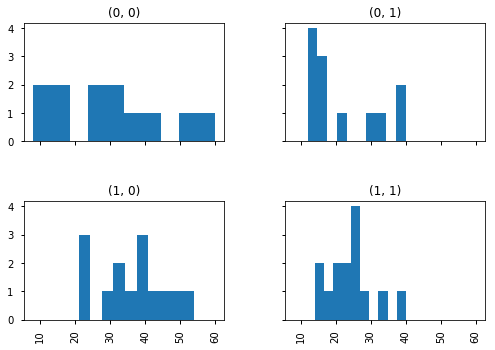

In [13]:
statistics.hist_scenario_display(full_df, 'visitCount_monitorHeartRate')

Observations:

* Subjects seem to look at the heart rate less frequently in the hard scenario with the full display than with the minimal display.

### Other Elements

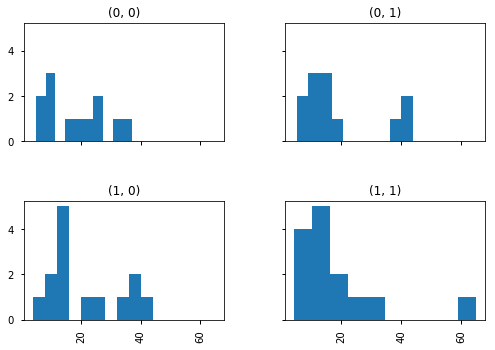

In [14]:
statistics.hist_scenario_display(full_df, 'visitCount_warmerInstrumentPanel')

I can't make out any meaningful differences here.

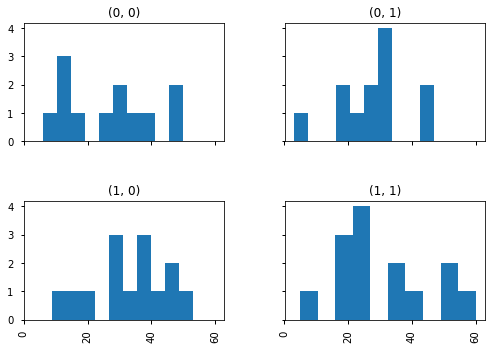

In [15]:
statistics.hist_scenario_display(full_df, 'visitCount_infant')

I can't make out any meaningful differences here.

## Conclusions

Aggregate Gaze Count plots don't seem to be very informative compared to the Aggregate Gaze Duration plots.